In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm


In [2]:
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.head(5)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epith_cell_size', 'bare_nuclei',
       'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [4]:
df.replace('?', -99999,inplace = True)
df.drop(['id'],1,inplace=True)

In [5]:
df.isnull().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
Bland_chromatin           0
Normal_nucleoli           0
Mitoses                   0
class                     0
dtype: int64

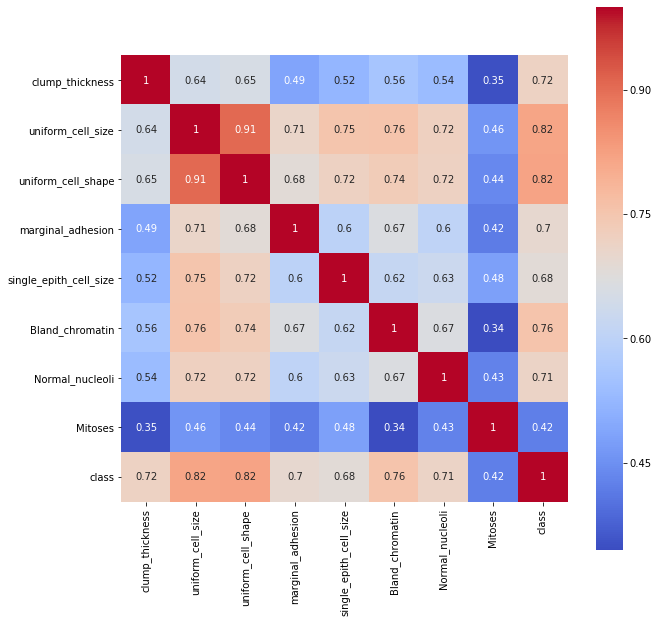

In [6]:
plt.figure(figsize=[10,10])
sns.heatmap(df[df.columns[0:11]].corr(),annot=True,square=True,cmap = 'coolwarm')
plt.show()

In [7]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
clf = svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
score

/Users/manukhurana/Desktop/Python/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9642857142857143

In [10]:
predict_data = np.array([(2, 1, 2, 1, 2, 1, 3, 1, 1)])
predict_data = predict_data.reshape(len(predict_data),-1)
predict = clf.predict(predict_data)
predict

array([2])

In [17]:
for k in ['linear','rbf','sigmoid','poly']:
    clf = svm.SVR(kernel=k, gamma='scale')
    clf.fit(X_train, y_train)
  
    predict = clf.score(X_test,y_test)
    print(k,predict)

linear -889.9475646136856
rbf -0.38038053657729765
sigmoid -0.38240986510223185
poly -0.3807073667462757
